In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from utils import *
from img_utils import *

# Loading Data 

In [5]:
path = "../nybolig-scrape/output/part_1"
houses_df = data_to_DF(path)
print("Number of datapoints of type 'Ejerlejlighed': ", len(houses_df))  # TODO: Try including houses that dont have energy label and other missing data
display(houses_df)

Number of datapoints of type 'Ejerlejlighed':  880


,address,postal_code,type,price,size,basement_size,rooms,year_built,year_rebuilt,energy_label,image_floorplan
0,Acaciavej 1 1. 1867 Frederiksberg C,1867,ejerlejlighed,9995000,124,None,4.0,1875.0,2022.0,B,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,Agerskovvej 4D 2. 2610 Rødovre,2610,ejerlejlighed,1945000,70,None,2.0,1968.0,NaN,D,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,Agerskovvej 4M st. 2610 Rødovre,2610,ejerlejlighed,2195000,70,None,2.0,1968.0,NaN,D,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,Aggersborggade 9 1. tv 2100 København Ø,2100,ejerlejlighed,5650000,80,None,3.0,1896.0,1933.0,D,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,Aggersvoldvej 3B 3. 2700 Brønshøj,2700,ejerlejlighed,2725000,66,None,3.0,1934.0,NaN,C,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...,...,...,...,...,...,...,...,...
875,Østerbrogade 212 2. tv 2100 København Ø,2100,ejerlejlighed,2495000,86,None,3.0,1938.0,NaN,C,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
876,Østerbrogade 224 1. th 2100 København Ø,2100,ejerlejlighed,3645000,70,None,2.0,1938.0,NaN,C,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
877,Østerbrogade 224 4. th. 2100 København Ø,2100,ejerlejlighed,4295000,70,None,3.0,1938.0,NaN,C,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
878,Østervej 13A st. tv 2600 Glostrup,2600,ejerlejlighed,1795000,57,None,2.0,1938.0,1998.0,D,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


# Setting up splits

In [6]:
from sklearn.model_selection import train_test_split

# Remove outliers
houses_df = remove_outliers(houses_df, "price", z_score_threshold=2)
display(houses_df)

# Split the data into train, validation and test sets with a 60-20-20 ratio
train_df, test_df = train_test_split(houses_df, test_size=0.2, random_state=0)
train_df, valid_df = train_test_split(train_df, test_size=0.20, random_state=0)

,address,postal_code,type,price,size,basement_size,rooms,year_built,year_rebuilt,energy_label,image_floorplan
1,Agerskovvej 4D 2. 2610 Rødovre,2610,ejerlejlighed,1945000,70,None,2.0,1968.0,NaN,D,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,Agerskovvej 4M st. 2610 Rødovre,2610,ejerlejlighed,2195000,70,None,2.0,1968.0,NaN,D,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
3,Aggersborggade 9 1. tv 2100 København Ø,2100,ejerlejlighed,5650000,80,None,3.0,1896.0,1933.0,D,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
4,Aggersvoldvej 3B 3. 2700 Brønshøj,2700,ejerlejlighed,2725000,66,None,3.0,1934.0,NaN,C,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
5,Ahornsgade 9 4. th 2200 København N,2200,ejerlejlighed,3195000,51,None,2.0,1886.0,NaN,D,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
...,...,...,...,...,...,...,...,...,...,...,...
874,Østerbrogade 206 4. tv. 2100 København Ø,2100,ejerlejlighed,4295000,77,None,3.0,1938.0,NaN,C,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
875,Østerbrogade 212 2. tv 2100 København Ø,2100,ejerlejlighed,2495000,86,None,3.0,1938.0,NaN,C,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
876,Østerbrogade 224 1. th 2100 København Ø,2100,ejerlejlighed,3645000,70,None,2.0,1938.0,NaN,C,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
877,Østerbrogade 224 4. th. 2100 København Ø,2100,ejerlejlighed,4295000,70,None,3.0,1938.0,NaN,C,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."


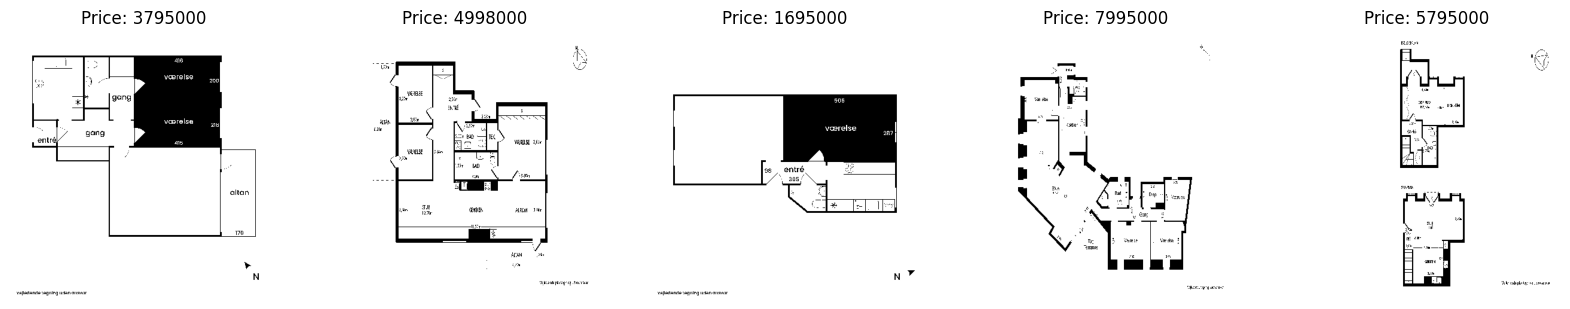

In [7]:
target_width = 448
target_height = 448

resize: bool = True
gray_scale: bool = False
threshhold: bool = False

train_images_RGB = preprocess_images(train_df, "image_floorplan", target_width, target_height, resize = resize, gray_scale = gray_scale, threshhold = threshhold)
validation_images_RGB = preprocess_images(valid_df, "image_floorplan", target_width, target_height, resize = resize, gray_scale = gray_scale, threshhold = threshhold)
test_images_RGB = preprocess_images(test_df, "image_floorplan", target_width, target_height, resize = resize, gray_scale = gray_scale, threshhold = threshhold)

train_prices = train_df['price']
validation_prices = valid_df['price']
test_prices = test_df['price']

#Plot the first 5 images and their prices 
fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    ax[i].imshow(train_images_RGB[i])
    ax[i].set_title(f"Price: {train_prices.iloc[i]}")
    ax[i].axis('off')
plt.show()


# Model Fitting

2024-03-21 09:40:04.932783: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:40:04.960061: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:40:04.960228: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:40:04.964927: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:40:04.965194: I external/local_xla/xla/stream_executor

1 Physical GPUs, 1 Logical GPU


2024-03-21 09:40:05.139851: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:40:05.139983: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:40:05.140000: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2022] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2024-03-21 09:40:05.140059: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:40:05.140077: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created

Model: "vit-b32_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b32 (Functional)        (None, 768)               87568128  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (Batch  (None, 768)               3072      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 1)                 769       
                                                                 
Total params: 87571969 (334.06 MB)
Trainable params: 2305 (9.00 KB)
Non-trainable params: 87569664 (334.05 MB)
_________________________________________________________________
Epoch 1/25


2024-03-21 09:40:24.678365: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-03-21 09:40:24.975865: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-21 09:40:26.613655: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-21 09:40:27.879439: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fd45dd41340 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-21 09:40:27.879477: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1080, Compute Capability 6.1
2024-03-21 09:40:27.884228: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1711010427.948165   20090 device_compiler.

17/17 [==============================] - 30s 809ms/step - loss: 3640814.2500 - val_loss: 3028160.5000
Epoch 2/25
17/17 [==============================] - 9s 518ms/step - loss: 1859202.6250 - val_loss: 1543199.7500
Epoch 3/25
17/17 [==============================] - 9s 537ms/step - loss: 1437202.0000 - val_loss: 1481227.5000
Epoch 4/25
17/17 [==============================] - 9s 551ms/step - loss: 1366030.5000 - val_loss: 1436000.7500
Epoch 5/25
17/17 [==============================] - 9s 517ms/step - loss: 1342863.0000 - val_loss: 1427947.8750
Epoch 6/25
17/17 [==============================] - 9s 518ms/step - loss: 1325393.0000 - val_loss: 1425299.7500
Epoch 7/25
17/17 [==============================] - 9s 518ms/step - loss: 1317426.8750 - val_loss: 1432678.6250
Epoch 8/25
17/17 [==============================] - 9s 518ms/step - loss: 1330607.3750 - val_loss: 1487428.5000
Epoch 9/25
17/17 [==============================] - 9s 518ms/step - loss: 1301618.3750 - val_loss: 1428340.5000
Ep

INFO:tensorflow:Assets written to: ./vit-b32_regression_model/assets


INFO:tensorflow:Assets written to: ./vit-b32_regression_model/assets


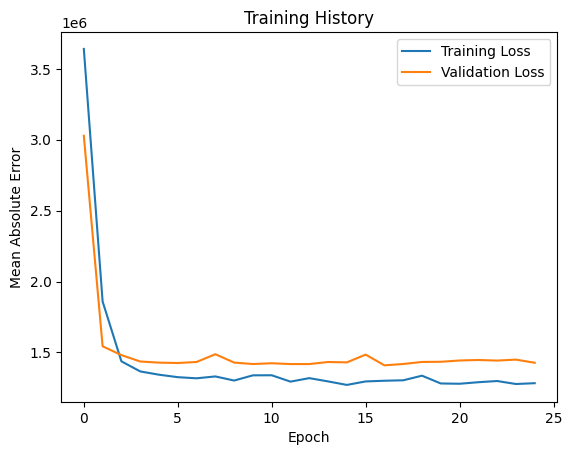

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from vit_keras import vit
import tensorflow as tf
from multiprocessing import Process, Queue

def train_model(fine_tune_layers: int = 0):
    """
    Train a model with the vit-b32 architecture on the given data.
    
    Args:
        fine_tune_layers (int): Number of layers to fine-tune, counting from the top of the model.
    """
    set_gpu()
    
    # Load pre-trained vit-b32 model (excluding top layers)
    base_model = vit.vit_b32(
        weights = 'imagenet21k+imagenet2012',
        image_size = (target_width, target_height),
        activation = 'linear', 
        include_top = False, 
        pretrained = True, 
        pretrained_top = False
    )

    # Freeze the pre-trained layers
    for layer in base_model.layers[:-fine_tune_layers] if fine_tune_layers > 0 else base_model.layers:
        layer.trainable = False

    # Add new top layers for regression
    model = Sequential([
        base_model,
        Flatten(),
        BatchNormalization(),
        Dense(1, activation='linear', kernel_regularizer=l2(0.01))
    ], name='vit-b32_regression')

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=5), loss='mean_absolute_error')
    model.summary()

    # Train the model with early stopping
    # early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    # history = model.fit(train_images_RGB, train_df["price"], validation_data=(validation_images_RGB, valid_df["price"]), epochs=100, callbacks=[early_stopping])
    history = model.fit(train_images_RGB, train_df["price"], validation_data=(validation_images_RGB, valid_df["price"]), epochs=25)

    model.save("./vit-b32_regression_model")

    # Plot the training history
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training History')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Absolute Error')
    plt.legend()
    plt.show()

p = Process(target=train_model, args=(0,))
p.start()
p.join()

In [17]:
# model = Sequential([
#     base_model,
#     Flatten(),
#     BatchNormalization(),
#     Dense(1, activation='linear')
# ])
# # learning rate: 5
# # epochs: 100
# # results:
# # R2 score: 0.01
# # Mean Absolute Error: 1425813.16
# # Mean Squared Error: 3301341554519.32

# # With early stopping
# # learning rate: 5
# # epochs: 100
# # results:
# # R2 score: -0.01
# # Mean Absolute Error: 1394887.92
# # Mean Squared Error: 3369604866810.33

# # learning rate: 1000
# # epochs: 100
# # results:
# # R2 score: -8104.67
# # Mean Absolute Error: 157533011.31
# # Mean Squared Error: 26973129612335696.00

# # learning rate: 100
# # epochs: 100
# # results:
# # R2 score: -0.05
# # Mean Absolute Error: 1413030.13
# # Mean Squared Error: 3478251521673.40

# model = Sequential([
#     base_model,
#     Flatten(),
#     BatchNormalization(),
#     Dense(1, activation='linear', kernel_regularizer=l2(0.01))
# ], name='vit-b32_regression')
# # learning rate: 5
# # epochs: 25
# # results:
# # R2 score: -0.10
# # Mean Absolute Error: 1474908.46
# # Mean Squared Error: 4101057518607.11

# model = Sequential([
#     base_model,
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dropout(0.5),
#     BatchNormalization(),
#     Dense(256, activation='relu'),
#     Dropout(0.5),
#     BatchNormalization(),
#     Dense(1, activation='linear')
# ], name='vit-b32_regression')
# # learning rate: 5
# # epochs: 100
# # results:
# # R2 score: -0.14
# # Mean Absolute Error: 1501699.82
# # Mean Squared Error: 4252935780924.88

# Model Evaluation

In [18]:
def evaluate_model(queue: Queue):
    set_gpu()
    
    # Evaluate the model
    loaded_model = tf.keras.models.load_model("./vit-b32_regression_model")
    loaded_model.evaluate(test_images_RGB, test_df["price"])
    predictions = loaded_model.predict(test_images_RGB)
    
    queue.put(predictions)

def evaluate_naive_model() -> np.ndarray:
    naive_predictions = np.mean(train_df["price"])
    naive_mae = np.mean(np.abs(test_df["price"] - naive_predictions))
    return naive_predictions

2024-03-21 09:44:52.241093: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:44:52.261206: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:44:52.261369: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:44:52.264526: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:44:52.264645: I external/local_xla/xla/stream_executor

1 Physical GPUs, 1 Logical GPU


2024-03-21 09:44:52.476020: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:44:52.476137: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:44:52.476154: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2022] Could not identify NUMA node of platform GPU id 0, defaulting to 0.  Your kernel may not have been built with NUMA support.
2024-03-21 09:44:52.476212: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:44:52.476229: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created

6/6 [==============================] - 5s 326ms/step
R2 score: -0.10
Mean Absolute Error: 1474908.46
Mean Squared Error: 4101057518607.11


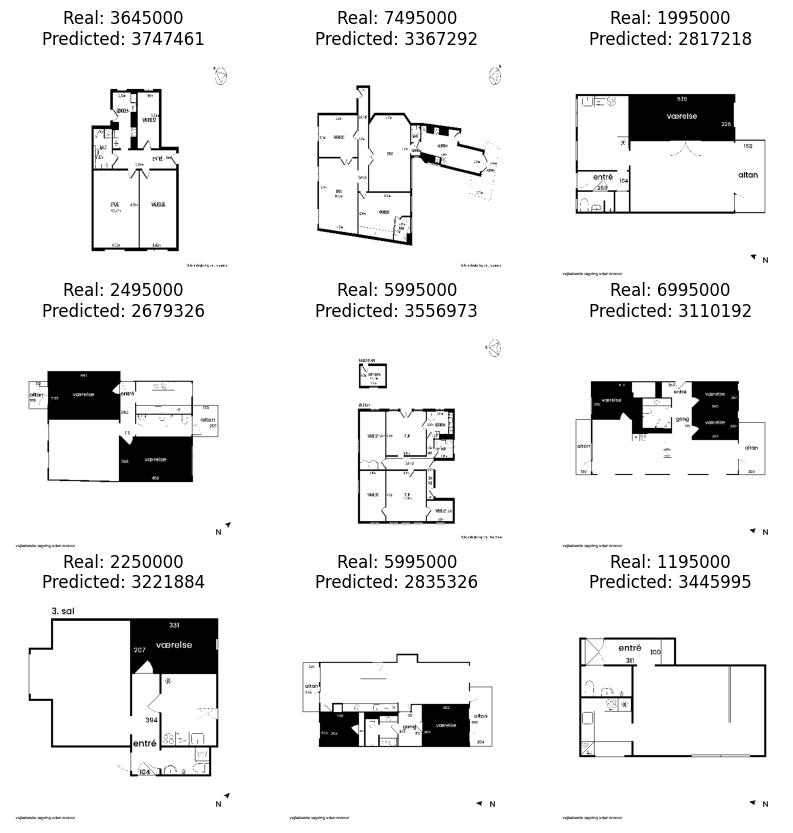

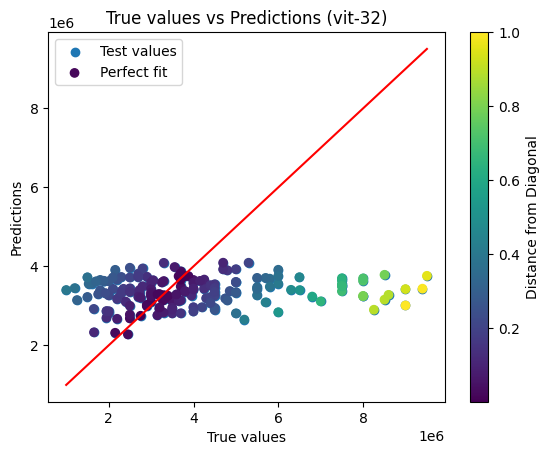

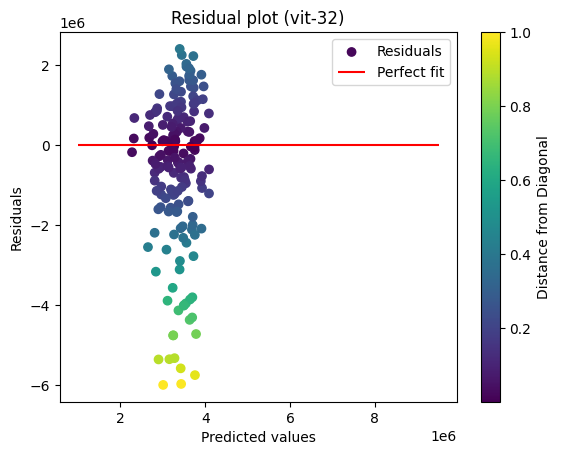

In [19]:
queue = Queue()
p = Process(target=evaluate_model, args=(queue,))
p.start()
p.join()

if queue.empty():
    raise ValueError("Nothing was returned from the process")
predictions = queue.get()
real_prices = test_df['price'].values
predicted_prices = predictions.flatten()

# Print the R2 score, MAE and MSE
print(f"R2 score: {r2_score(real_prices, predicted_prices):.2f}")
print(f"Mean Absolute Error: {mae(real_prices, predicted_prices):.2f}")
print(f"Mean Squared Error: {mse(real_prices, predicted_prices):.2f}")

# Plot the predictions
plt.figure(figsize=(10, 10))
for i, (image, label, prediction) in enumerate(zip(test_images_RGB[0:9], test_df["price"][0:9], predictions[0:9])):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Real: {label}\nPredicted: {prediction[0]:.0f}")
    plt.axis("off")
plt.show()

# Plot the predictions vs real prices
plot_regression_results('vit-32', real_prices, predicted_prices)

Naive R2 score: -0.03
Naive Mean Absolute Error: 1480987.94
Naive Mean Squared Error: 3843613629012.95


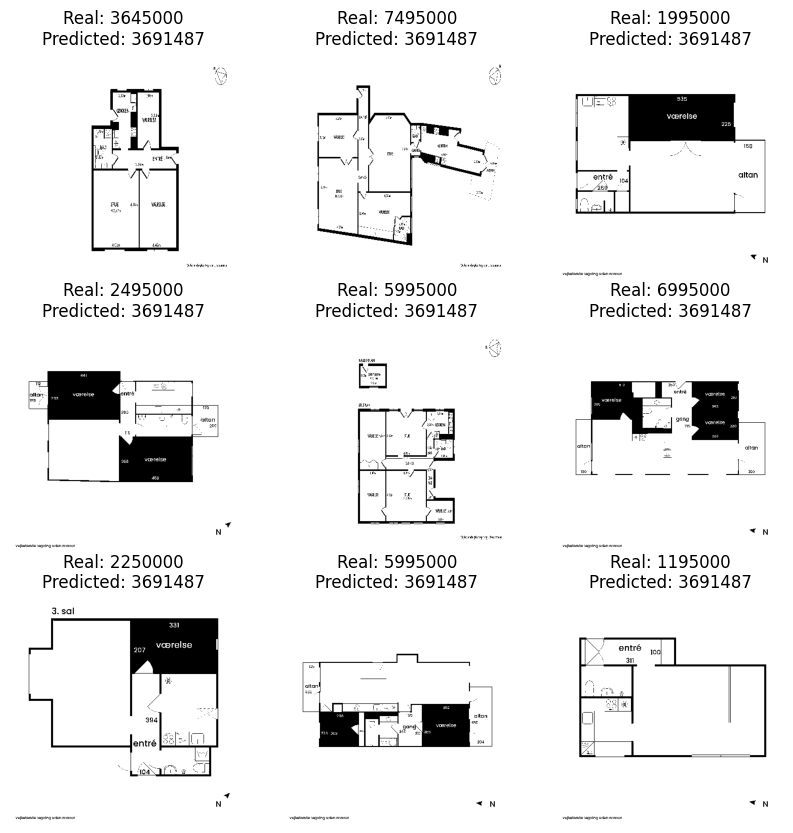

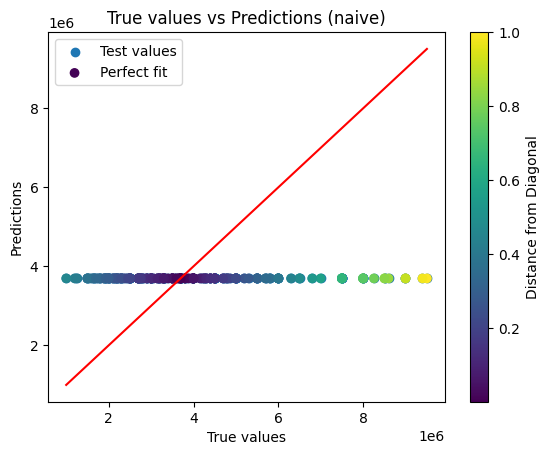

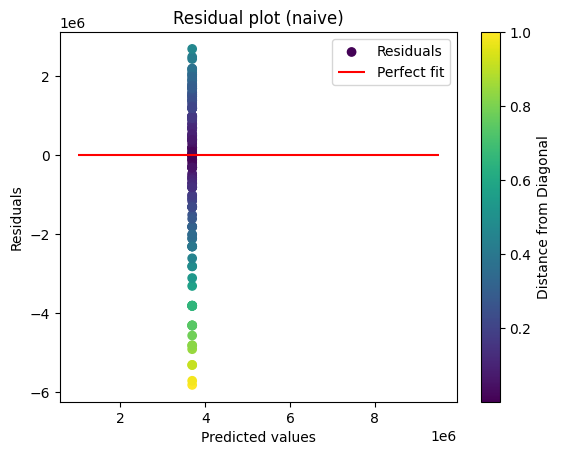

In [20]:
# Print the naive model's R2, MAE and MSE
naive_predictions = evaluate_naive_model()
naive_mae = np.mean(np.abs(test_df["price"] - naive_predictions))
naive_mse = np.mean((test_df["price"] - naive_predictions) ** 2)
print(f"Naive R2 score: {r2_score(test_df['price'], np.full(len(test_df), naive_predictions)):.2f}")
print(f"Naive Mean Absolute Error: {naive_mae:.2f}")
print(f"Naive Mean Squared Error: {naive_mse:.2f}")

# Plot the naive model's predictions
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(zip(test_images_RGB[0:9], test_df["price"][0:9])):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"Real: {label}\nPredicted: {naive_predictions:.0f}")
    plt.axis("off")
plt.show()

# Plot the naive model's predictions vs real prices
plot_regression_results('naive', test_df['price'], np.full(len(test_df), naive_predictions))

# Visualizing Predictions

## Saliency

1 Physical GPUs, 1 Logical GPU


2024-03-21 09:45:37.120674: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:45:37.136919: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:45:37.137031: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:45:37.138691: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:45:37.138811: I external/local_xla/xla/stream_executor

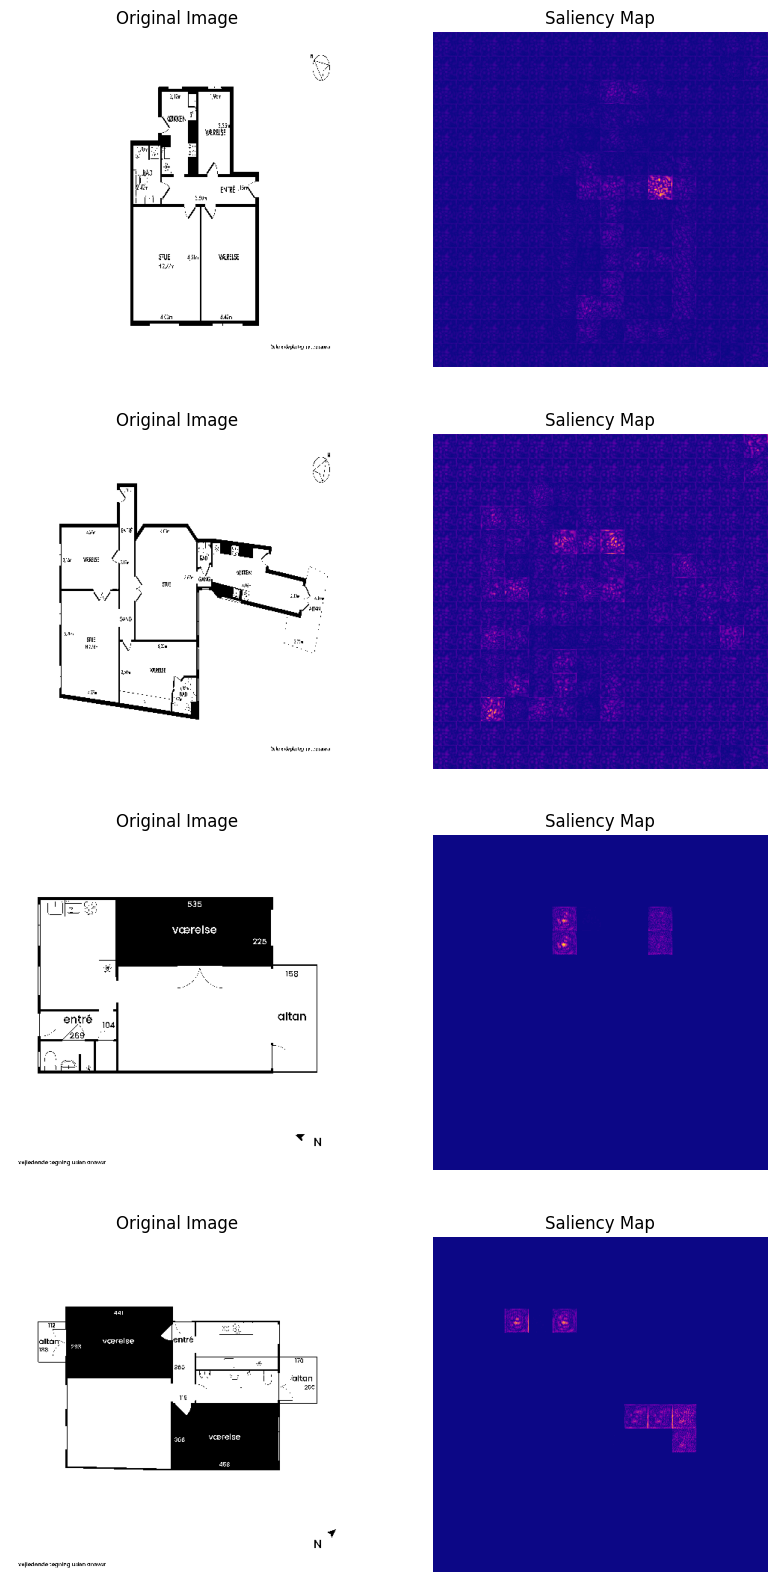

In [21]:
import numpy as np

def get_saliency_maps(images: np.ndarray):
    set_gpu()
    model = tf.keras.models.load_model("./vit-b32_regression_model")
    saliency_maps = []
    for image in images:
        with tf.GradientTape() as tape:
            image = tf.convert_to_tensor(image, dtype=tf.float32)
            image = tf.expand_dims(image, axis=0)
            tape.watch(image)
            predictions = model(image)

        # Compute gradients of the output with respect to the input image
        gradient = tape.gradient(predictions, image)
        
        # Take absolute value of gradients to get saliency map
        saliency_map = tf.abs(gradient)
        
        # Reshape saliency map
        saliency_map = tf.reshape(saliency_map, image.shape[1:])  # Remove batch dimension
        
        # Normalize between 0 and 1
        saliency_map /= tf.reduce_max(saliency_map)

        # Set color channels to 0
        saliency_map = saliency_map[:, :, 0]

        saliency_maps.append(saliency_map)

    return saliency_maps

def plot_saliency_maps(images):
    fig, axes = plt.subplots(n_images, 2, figsize=(10, 5 * n_images))
    saliency_maps = get_saliency_maps(images)

    if len(images) > 1:
        for i, image in enumerate(images):
            # Plot the original image
            axes[i, 0].imshow(image)
            axes[i, 0].set_title("Original Image")
            axes[i, 0].axis("off")
            
            # Plot the saliency map
            axes[i, 1].imshow(saliency_maps[i], cmap="plasma")
            axes[i, 1].set_title("Saliency Map")
            axes[i, 1].axis("off")
    else:
        # Plot the original image
        axes[0].imshow(images[0])
        axes[0].set_title("Original Image")
        axes[0].axis("off")
        
        # Plot the saliency map
        axes[1].imshow(saliency_maps[0], cmap="plasma")
        axes[1].set_title("Saliency Map")
        axes[1].axis("off")

    plt.show()

n_images: int = 4

p = Process(target=plot_saliency_maps, args=(test_images_RGB[:n_images],))
p.start()
p.join()

## Attention Maps

1 Physical GPUs, 1 

2024-03-21 09:46:10.617251: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:46:10.636176: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:46:10.636284: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:46:10.639598: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-21 09:46:10.639721: I external/local_xla/xla/stream_executor

Logical GPU


/home/besplago/.pyenv/versions/penv/lib/python3.11/site-packages/vit_keras/utils.py:81: UserWarning: Resizing position embeddings from 12, 12 to 14, 14
  warnings.warn(
2024-03-21 09:46:18.157865: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-03-21 09:46:18.310477: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-21 09:46:18.610525: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 4s 4s/step


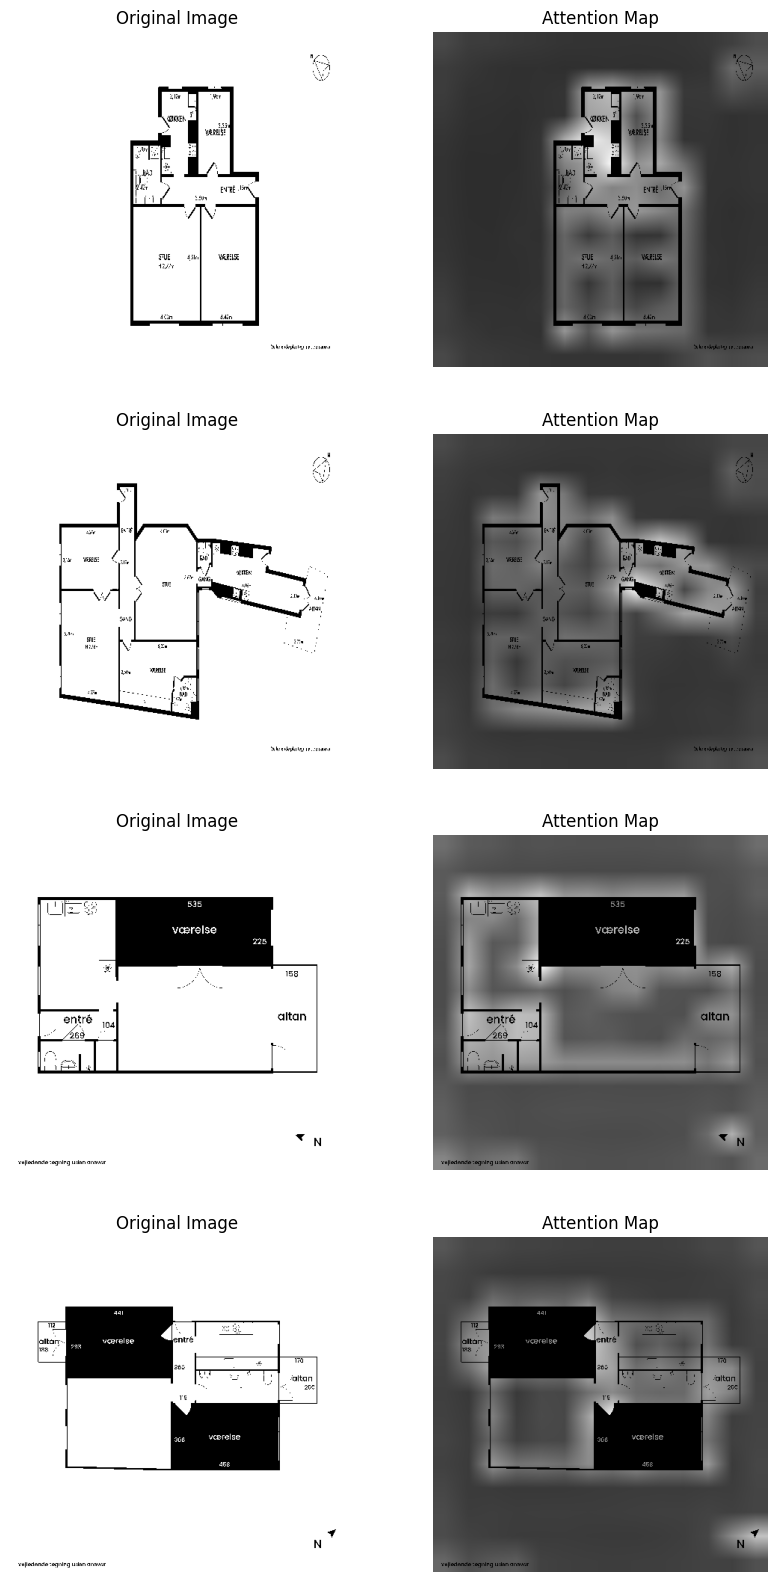

In [22]:
from vit_keras import visualize

def plot_attention_maps(images: np.ndarray):
    set_gpu()
    # Load pre-trained vit-b32 model (excluding top layers)
    model = vit.vit_b32(
        weights = 'imagenet21k+imagenet2012',
        image_size = (target_width, target_height),
        activation = 'linear', 
        include_top = False, 
        pretrained = True, 
        pretrained_top = False
    )
    attention_maps = []
    for image in images:
        attention_map = visualize.attention_map(model, image)
        attention_maps.append(attention_map)

    fig, axes = plt.subplots(nrows = n_images, ncols = 2, figsize=(10, 5 * n_images))
    if len(images) > 1:
        for i, image in enumerate(images):
            # Plot the original image
            axes[i, 0].imshow(image)
            axes[i, 0].set_title("Original Image")
            axes[i, 0].axis("off")
            
            # Plot the attention map
            axes[i, 1].imshow(attention_maps[i])
            axes[i, 1].set_title("Attention Map")
            axes[i, 1].axis("off")
    else:
        # Plot the original image
        axes[0].imshow(images[0])
        axes[0].set_title("Original Image")
        axes[0].axis("off")
        
        # Plot the attention map
        axes[1].imshow(attention_maps[0])
        axes[1].set_title("Attention Map")
        axes[1].axis("off")

    plt.show()

n_images: int = 4

p = Process(target=plot_attention_maps, args=(test_images_RGB[:n_images],))
p.start()
p.join()

## Class Activation Maps (doesn't work, WIP)

In [23]:
# from tensorflow.keras import backend as K

# def get_class_activation_maps(images: np.ndarray):
#     set_gpu()
#     model = tf.keras.models.load_model("./VGG16_regression_model")
#     classifier_layer = model.get_layer("dense_2")
#     base_model = model.get_layer("vgg16")
#     last_conv_layer = base_model.get_layer("block5_conv3")

#     class_activation_maps = []
#     for image in images:
#         # Convert the image to a tensor of type float32
#         image = tf.convert_to_tensor(image, dtype=tf.float32)
#         image = tf.expand_dims(image, axis=0)

#         # Get the model's prediction
#         predictions = model(image)

#         # Get the class with the highest probability
#         predicted_class = tf.argmax(predictions[0]).numpy()

#         # Get the output of the classifier layer for the predicted class
#         class_out = model.output[:, predicted_class]

#         # Get the output of the last convolutional layer
#         last_conv_output = last_conv_layer.output

#         with tf.GradientTape() as tape:
#             # Compute the gradient of the class output value with respect to the feature map
#             grads = tape.gradient(class_out, last_conv_output)

#         # Vector of shape (512,), where each entry is the mean intensity of the gradient over a specific feature map channel
#         pooled_grads = K.mean(grads, axis=(0, 1, 2))

#         # Multiply each channel in the feature map array by "how important this channel is" with regard to the class
#         last_conv_output_value = last_conv_output[0].numpy()
#         pooled_grads_value = pooled_grads.numpy()
#         for i in range(512):
#             last_conv_output_value[:, :, i] *= pooled_grads_value[i]

#         # The channel-wise mean of the resulting feature map is our class activation map
#         class_activation_map = np.mean(last_conv_output_value, axis=-1)

#         # Normalize between 0 and 1
#         class_activation_map -= np.min(class_activation_map)
#         class_activation_map /= np.max(class_activation_map)

#         class_activation_maps.append(class_activation_map)

#     return class_activation_maps

# def plot_class_activation_maps(images):
#     fig, axes = plt.subplots(n_images, 2, figsize=(10, 5 * n_images))
#     class_activation_maps = get_class_activation_maps(images)

#     if len(images) > 1:
#         for i, image in enumerate(images):
#             # Plot the original image
#             axes[i, 0].imshow(image)
#             axes[i, 0].set_title("Original Image")
#             axes[i, 0].axis("off")
            
#             # Plot the class activation map
#             axes[i, 1].imshow(class_activation_maps[i], cmap="plasma")
#             axes[i, 1].set_title("Class Activation Map")
#             axes[i, 1].axis("off")
#     else:
#         # Plot the original image
#         axes[0].imshow(images[0])
#         axes[0].set_title("Original Image")
#         axes[0].axis("off")
        
#         # Plot the class activation map
#         axes[1].imshow(class_activation_maps[0], cmap="plasma")
#         axes[1].set_title("Class Activation Map")
#         axes[1].axis("off")

#     plt.show()

# p = Process(target=plot_class_activation_maps, args=(test_images_RGB[:n_images],))
# p.start()
# p.join()